## Zillow Predictive Power: House Price Prediction Model

In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


1. Dataset Creation

In [4]:
df = pd.read_csv('zillow_data.csv')
df



,RegionID,SizeRank,RegionName,RegionType,Price
0,3,48,Alaska,state,191693.15140
1,4,23,Alabama,state,111923.79460
2,6,33,Arkansas,state,113663.17930
3,8,13,Arizona,state,141053.63480
4,9,0,California,state,100050.50680
5,10,20,Colorado,state,128262.06230
6,11,28,Connecticut,state,107006.11860
7,12,49,District of Columbia,state,123834.00050
8,13,45,Delaware,state,128866.63110
9,14,2,Florida,state,115446.45140


In [31]:
df = df.dropna(subset=['Price'])
df

,RegionID,SizeRank,RegionName,RegionType,Price
0,3,48,Alaska,state,191693.15140
1,4,23,Alabama,state,111923.79460
2,6,33,Arkansas,state,113663.17930
3,8,13,Arizona,state,141053.63480
4,9,0,California,state,100050.50680
5,10,20,Colorado,state,128262.06230
6,11,28,Connecticut,state,107006.11860
7,12,49,District of Columbia,state,123834.00050
8,13,45,Delaware,state,128866.63110
9,14,2,Florida,state,115446.45140


In [35]:
df_encoded = pd.get_dummies(df, columns=['RegionName'], drop_first=True)

# Separate the features (X) and the target (y)
X = df_encoded.drop(columns=['Price'])  # Features (all columns except 'Price')
y = df_encoded['Price']  # Target (the 'Price' column)

In [37]:
print(df)

    RegionID  SizeRank            RegionName RegionType         Price
0          3        48                Alaska      state  191693.15140
1          4        23               Alabama      state  111923.79460
2          6        33              Arkansas      state  113663.17930
3          8        13               Arizona      state  141053.63480
4          9         0            California      state  100050.50680
5         10        20              Colorado      state  128262.06230
6         11        28           Connecticut      state  107006.11860
7         12        49  District of Columbia      state  123834.00050
8         13        45              Delaware      state  128866.63110
9         14         2               Florida      state  115446.45140
10        16         7               Georgia      state  175615.45740
11        18        40                Hawaii      state  125807.90330
12        19        31                  Iowa      state  177347.23040
13        20        

2. Data Preprocessing

In [51]:
X = df[['RegionID', 'SizeRank']]  
y = df['Price']  
df

,RegionID,SizeRank,RegionName,RegionType,Price
0,3,48,Alaska,state,191693.15140
1,4,23,Alabama,state,111923.79460
2,6,33,Arkansas,state,113663.17930
3,8,13,Arizona,state,141053.63480
4,9,0,California,state,100050.50680
5,10,20,Colorado,state,128262.06230
6,11,28,Connecticut,state,107006.11860
7,12,49,District of Columbia,state,123834.00050
8,13,45,Delaware,state,128866.63110
9,14,2,Florida,state,115446.45140


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Model Training

In [55]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

4. Model Evaluation

In [61]:
y_pred = linear_model.predict(X_test)

In [65]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 26235.008270664268
Root Mean Squared Error (RMSE): 30090.701309528395
R-squared (R²): -0.0875148217599826


5. Prediction

In [91]:
features = X_train.columns  
coefficients = pd.DataFrame({
    'RegionID': features,
    'Price': linear_model.coef_
})

print(coefficients)


   RegionID       Price
0  RegionID   -9.114473
1  SizeRank  153.049814


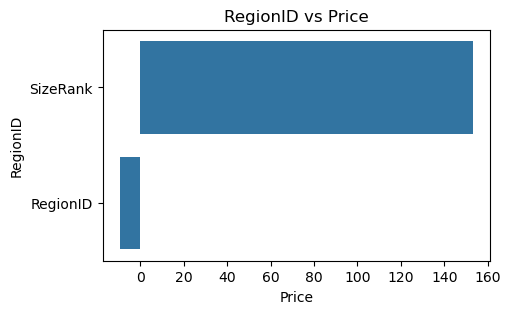

In [118]:
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': linear_model.coef_
})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(5, 3))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('RegionID vs Price')
plt.xlabel('Price')
plt.ylabel('RegionID')
plt.show()